# **Brett Huffman**

## **CSCI 5390**

## Main Project - Phase 2 With Output As Input

---
`Note: this Colab should only be used when testing Output As Input!!! Do not use it for anything else!`

---



Credit: The images for this project are from personal library and from Alamy.com covered under their Personal Use license.  Images can only be used for non-commercial purposes. 

In [ ]:
!git clone https://github.com/dicer2000/CSCI_5390

fatal: destination path 'CSCI_5390' already exists and is not an empty directory.


In [ ]:
# Checkout just the images folder from Github
! ls -l CSCI_5390/MainProject/Images

total 32
drwxr-xr-x 2 root root  4096 Feb 27 04:45 Ash
drwxr-xr-x 2 root root  4096 Feb 27 04:45 Cedar
drwxr-xr-x 2 root root 12288 Feb 27 04:45 Honeysuckle
drwxr-xr-x 2 root root  4096 Feb 27 04:45 Maple
drwxr-xr-x 2 root root  4096 Feb 27 04:45 Oak
-rw-r--r-- 1 root root   593 Feb 27 04:45 removeBlack.py


In [ ]:
# Check out the index file
import pandas as pd
df = pd.read_csv('CSCI_5390/MainProject/TreeImageMaster.csv')
df.head()

,id,image,treetype
0,1,Images/Oak/oak125.jpeg,1
1,2,Images/Oak/oak133.jpeg,1
2,3,Images/Oak/oak42.jpg,1
3,4,Images/Oak/oak56.jpg,1
4,5,Images/Oak/oak81.jpg,1


In [ ]:
# Import important libraries
import tensorflow as tf
import numpy as np
import math
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import layers, initializers
import matplotlib.pyplot as plt

## This next Section was not used in Phase II as we didn't need to collect seperate Validation data

In [ ]:
# Generate the Validation Folders

!mkdir CSCI_5390/MainProject/Validation
!mkdir CSCI_5390/MainProject/Validation/Images
!mkdir CSCI_5390/MainProject/Validation/Images/Ash
!mkdir CSCI_5390/MainProject/Validation/Images/Cedar
!mkdir CSCI_5390/MainProject/Validation/Images/Honeysuckle
!mkdir CSCI_5390/MainProject/Validation/Images/Maple
!mkdir CSCI_5390/MainProject/Validation/Images/Oak

In [ ]:

# Randomly move images from the main folder (Training) to Validation
from sklearn.utils import shuffle
df = shuffle(df)

# Designate 30% for Validation data
npdata = np.asarray(df)
index_30percent = int(0.3 * len(npdata[:, 0]))
print("Training split: ", index_30percent)

# Split the dataset and carve off last column.  This column
# is our result set
XVALID = npdata[:index_30percent, :-1]
YVALID = npdata[:index_30percent, -1]
XTRAIN = npdata[index_30percent:, :-1]
YTRAIN = npdata[index_30percent:, -1]


Training split:  239


In [ ]:
# Move all the designated files over to the Validation folders

for file in XVALID[:,1]:
  origFile = "CSCI_5390/MainProject/" + str(file)
  newFile  = "CSCI_5390/MainProject/Validation/" + str(file)
  print('-----')
  print(file)
  print(origFile)

  !mv $origFile $newFile


## Back to Phase II items...

In [ ]:
# Phase II Only
# Randomly shuffle data
from sklearn.utils import shuffle
df = shuffle(df)

# Designate 30% for Validation data
npdata = np.asarray(df)

XTRAIN = npdata[:, :-1]
YTRAIN = npdata[:, -1]

In [ ]:
print(XTRAIN.shape)
print(YTRAIN.shape)

(797, 2)
(797,)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)
#my_generator.fit(XTRAIN)


In [ ]:
# Generator for training dataset
train_dataset = my_generator.flow_from_directory( './CSCI_5390/MainProject/Images', target_size=(150, 150), batch_size=40, class_mode='categorical')


Found 798 images belonging to 5 classes.


In [ ]:
# Generator for validation dataset
validation_dataset = my_generator.flow_from_directory( './CSCI_5390/MainProject/Validation/Images', target_size=(150, 150), batch_size=40, class_mode='categorical')


In [ ]:
# Add Column to training dataset
# Empty placeholders for 797 RGB images and their labels

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './CSCI_5390/MainProject/Images',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(150, 150),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

print (train_ds)

Found 798 files belonging to 5 classes.
<BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


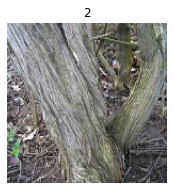

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(1):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
#XTRAIN = np.zeros((798, 150, 150, 3, 1))#, dtype=float)
#YTRAIN = np.zeros((798, 1))
XTRAIN = np.zeros((798, 150, 150, 4))#, dtype=float)
YTRAIN = np.zeros((798, 1))

In [ ]:
print(XTRAIN.shape, YTRAIN.shape)

(798, 150, 150, 4) (798, 1)


In [ ]:
# Pull everything from Generator
for i in range(798):
  for images, labels in train_ds.take(1):
    XTRAIN[i, :, :, :3] = images
    XTRAIN[i, :, :, 3 ] = labels[0] #np.reshape(labels, (150,150,1)) #labels.reshape((256, 256, 1))
#    print(labels[0])    
#print(XTRAIN)

In [ ]:
print(XTRAIN)
#print("_____")
#print(YTRAIN)


In [ ]:
# Check out the data shapes
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

print( labels_batch)

In [ ]:
# Check out the images
for _ in range(1):
    img, label = train_dataset.next()
    print("Shape: ", img.shape)
    print("Label: ", label) 
    plt.imshow(img[0])
    plt.show()
    plt.imshow(img[1])
    plt.show()
    plt.imshow(img[2])
    plt.show()
    plt.imshow(img[3])
    plt.show()
  

In [ ]:
# Model 2 = Fit in 
# 64 => 16

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="BestModel",
        save_best_only=True,
        monitor="accuracy" ) # val_loss") # When we have validation data
]

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = tf.keras.Input(shape=(150, 150, 4))
#x = data_augmentation(inputs)
#x = layers.Rescaling(1./255)(x)
x = inputs
#x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=4)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=4)(x)
#x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
#x = layers.Dropout(0.5)(x)
#x = layers.Dense(10, activation="relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
  
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
# One-hot the output
OneHot_YTRAIN = tf.one_hot(YTRAIN, depth=5)
OneHot_YTRAIN = tf.squeeze(OneHot_YTRAIN, [1])

In [ ]:
# Let loose the dogs
history = model.fit(x=XTRAIN, y=OneHot_YTRAIN, epochs=10) #, callbacks=callbacks)

Epoch 1/10
25/25 [==============================] - 1s 16ms/step - loss: 1.3525 - accuracy: 0.9599
Epoch 2/10
25/25 [==============================] - 0s 16ms/step - loss: 4.5654e-20 - accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 0s 16ms/step - loss: 4.5654e-20 - accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 0s 16ms/step - loss: 4.5654e-20 - accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 0s 16ms/step - loss: 4.5654e-20 - accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 0s 16ms/step - loss: 4.5654e-20 - accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 0s 16ms/step - loss: 4.5654e-20 - accuracy: 1.0000
Epoch 8/10
25/25 [==============================] - 0s 16ms/step - loss: 4.5654e-20 - accuracy: 1.0000
Epoch 9/10
25/25 [==============================] - 0s 16ms/step - loss: 4.5654e-20 - accuracy: 1.0000
Epoch 10/10
25/25 [==============================] - 0s 16ms/step - loss: 4.5

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 4)]     0         
                                                                 
 conv2d_11 (Conv2D)          (None, 148, 148, 32)      1184      
                                                                 
 flatten_5 (Flatten)         (None, 700928)            0         
                                                                 
 dense_9 (Dense)             (None, 5)                 3504645   
                                                                 
Total params: 3,505,829
Trainable params: 3,505,829
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(history.history)

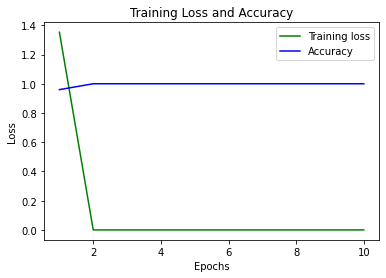

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()